# TER: Aide à l’orientation dans le supérieur : XGBoost (3 classes)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Colab Notebooks/TER/" 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


In [ ]:
import warnings
warnings.filterwarnings('ignore')


### Selection du nouveau train set et test set précédemment générés 


In [ ]:
# données de train
df1_train = pd.read_csv(path+'generated_data_class3/train1.csv')
df2_train = pd.read_csv(path+'generated_data_class3/train2.csv')
df3_train = pd.read_csv(path+'generated_data_class3/train3.csv')
df4_train = pd.read_csv(path+'generated_data_class3/train4.csv')
df5_train = pd.read_csv(path+'generated_data_class3/train5.csv')
df6_train = pd.read_csv(path+'generated_data_class3/train6.csv')
df7_train = pd.read_csv(path+'generated_data_class3/train7.csv')
df8_train = pd.read_csv(path+'generated_data_class3/train8.csv')
df9_train = pd.read_csv(path+'generated_data_class3/train9.csv')
df10_train = pd.read_csv(path+'generated_data_class3/train10.csv')
df11_train = pd.read_csv(path+'generated_data_class3/train11.csv')
df12_train = pd.read_csv(path+'generated_data_class3/train12.csv')
df13_train = pd.read_csv(path+'generated_data_class3/train13.csv')
df14_train = pd.read_csv(path+'generated_data_class3/train14.csv')
df15_train = pd.read_csv(path+'generated_data_class3/train15.csv')

#données de test
df1_test = pd.read_csv(path+'generated_data_class3/test1.csv')
df2_test = pd.read_csv(path+'generated_data_class3/test2.csv')
df3_test = pd.read_csv(path+'generated_data_class3/test3.csv')
df4_test = pd.read_csv(path+'generated_data_class3/test4.csv')
df5_test = pd.read_csv(path+'generated_data_class3/test5.csv')
df6_test = pd.read_csv(path+'generated_data_class3/test6.csv')
df7_test = pd.read_csv(path+'generated_data_class3/test7.csv')
df8_test = pd.read_csv(path+'generated_data_class3/test8.csv')
df9_test = pd.read_csv(path+'generated_data_class3/test9.csv')
df10_test = pd.read_csv(path+'generated_data_class3/test10.csv')
df11_test = pd.read_csv(path+'generated_data_class3/test11.csv')
df12_test = pd.read_csv(path+'generated_data_class3/test12.csv')
df13_test = pd.read_csv(path+'generated_data_class3/test13.csv')
df14_test = pd.read_csv(path+'generated_data_class3/test14.csv')
df15_test = pd.read_csv(path+'generated_data_class3/test15.csv')

df_train = [df1_train,df2_train,df3_train,df4_train,df5_train,df6_train,df7_train,df8_train,df9_train,df10_train,df11_train,df12_train,df13_train,df14_train,df15_train]
df_test = [df1_test,df2_test,df3_test,df4_test,df5_test,df6_test,df7_test,df8_test,df9_test,df10_test,df11_test,df12_test,df13_test,df14_test,df15_test]

In [ ]:
#résultats des élèves classe 0(echecs) ou 1(reussites) ou 2(moyens)
y_col = 'resultats_iut_tdats1'

Prepare Data

In [ ]:
X_train,y_train,X_test,y_test = [],[],[],[]

for i in range(15):
    dfi_train = df_train[i]
    dfi_test = df_test[i]
    y_train.append(dfi_train[y_col])
    X_train.append(dfi_train[dfi_train.columns.drop(y_col)])
    y_test.append(dfi_test[y_col])
    X_test.append(dfi_test[dfi_test.columns.drop(y_col)])
    
    sc = StandardScaler()
    X_train[i] = sc.fit_transform(X_train[i])
    X_test[i] = sc.transform(X_test[i])

### XGBoost

In [ ]:
 import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the XGBClassifier model for multiclass classification
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)


Acc, Precis, Recall, F1 = [],[],[],[]
y_pred = []

for i in range(15):
  # Train the model
  xgb_model.fit(X_train[i], y_train[i])

  # Make predictions on the test set
  y_predicted = xgb_model.predict(X_test[i])
  y_pred.append(y_predicted)

  # Calculating the evaluation metrics
  accuracy = accuracy_score(y_test[i], y_predicted)
  Acc.append(accuracy)
  precision = precision_score(y_test[i], y_predicted, average='weighted')
  Precis.append(precision)
  recall = recall_score(y_test[i], y_predicted, average='weighted')
  Recall.append(recall)
  f1 = f1_score(y_test[i], y_predicted, average='weighted')
  F1.append(f1)

  # Printing the evaluation metrics and the best hyperparameters
  print(' ')
  print('DATASET ', i+1)
  print("Accuracy: ", accuracy)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1 score: ", f1)


 
DATASET  1
Accuracy:  0.5853658536585366
Precision:  0.5683347350714887
Recall:  0.5853658536585366
F1 score:  0.5752032520325203
 
DATASET  2
Accuracy:  0.5365853658536586
Precision:  0.4741869918699187
Recall:  0.5365853658536586
F1 score:  0.4928012622444284
 
DATASET  3
Accuracy:  0.6829268292682927
Precision:  0.6681184668989547
Recall:  0.6829268292682927
F1 score:  0.6270585782780905
 
DATASET  4
Accuracy:  0.5365853658536586
Precision:  0.4819976771196284
Recall:  0.5365853658536586
F1 score:  0.5009564801530368
 
DATASET  5
Accuracy:  0.6341463414634146
Precision:  0.5687973086627418
Recall:  0.6341463414634146
F1 score:  0.5996965806978642
 
DATASET  6
Accuracy:  0.6829268292682927
Precision:  0.6173780487804879
Recall:  0.6829268292682927
F1 score:  0.6320437342304457
 
DATASET  7
Accuracy:  0.6341463414634146
Precision:  0.6071849092875166
Recall:  0.6341463414634146
F1 score:  0.6115791709441043
 
DATASET  8
Accuracy:  0.6097560975609756
Precision:  0.6829268292682927
Re

#### Moyenne des valeurs des métriques pour chaque Dataset

In [ ]:
print("Mean of test accuracy for the 15 dataset = ", np.mean(Acc))
print("Mean of test precision for the 15 dataset = ", np.mean(Precis))
print("Mean of test Recall for the 15 dataset = ", np.mean(Recall))
print("Mean of test f1-score for the 15 dataset = ", np.mean(F1))

Mean of test accuracy for the 15 dataset =  0.6
Mean of test f1_score for the 15 dataset =  0.5677159165382505
Mean of test precision for the 15 dataset =  0.6
Mean of test recall for the 15 dataset =  0.5660645194875041


### Matrice de confusion

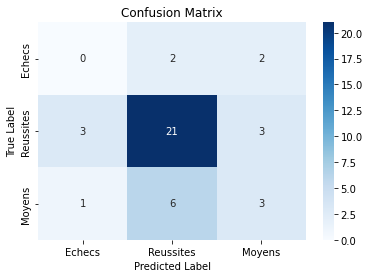

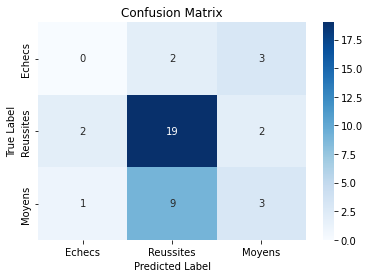

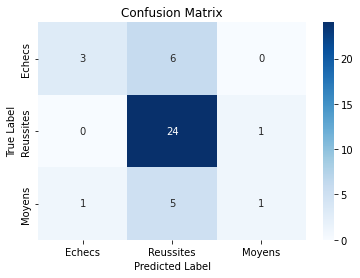

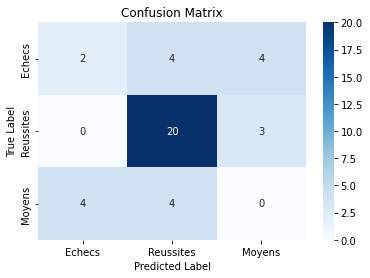

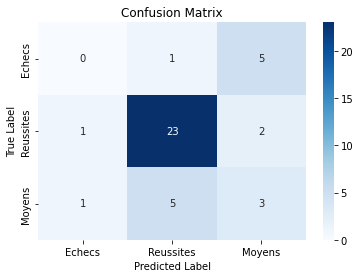

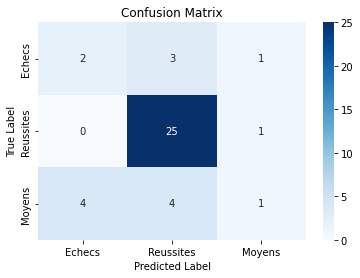

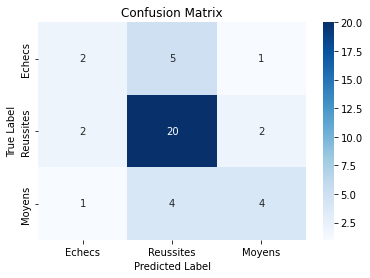

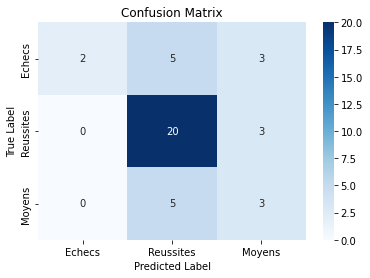

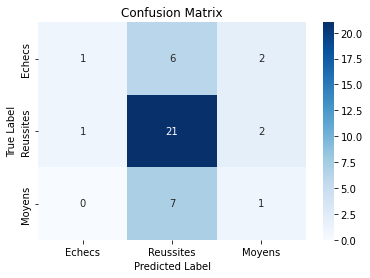

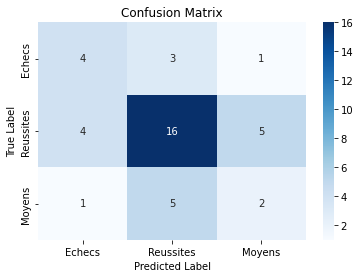

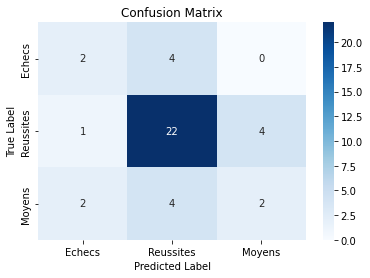

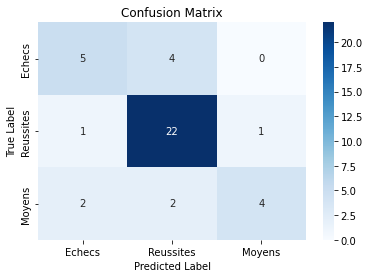

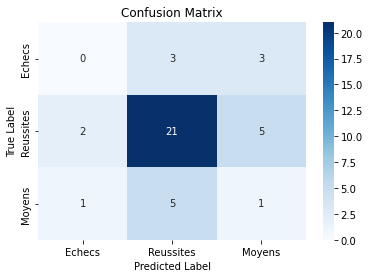

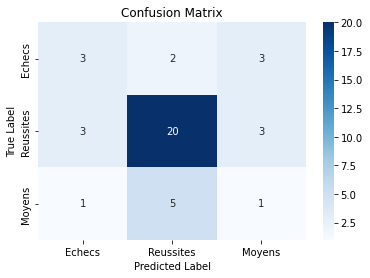

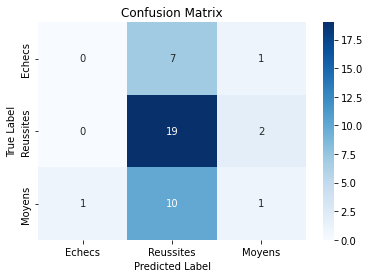

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for i in range(15):
  # Compute the confusion matrix
  cm = confusion_matrix(y_test[i], y_pred[i])

  # Plot the confusion matrix as a heatmap
  sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Echecs", "Reussites", "Moyens"], yticklabels=["Echecs", "Reussites", "Moyens"])
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()
